In [11]:
import numpy as np
import sympy as sm
sm.init_printing(use_unicode=True)

In [35]:
alpha = sm.symbols('alpha')
b = sm.symbols('b')
gamma = sm.symbols('gamma')
h = sm.symbols('h')
phi = sm.symbols('phi')
yt = sm.symbols('y_t')
pit = sm.symbols('pi_t')
pit_m1=sm.symbols('pi_t-1')
yt_m1 = sm.symbols('y_t-1')
vt = sm.symbols('v_t')
st = sm.symbols('s_t')
st_m1 = sm.symbols('s_t-1')
rt = sm.symbols('r_t')
it = sm.symbols('i_t')
exp_pit = sm.symbols('E[pi_t]')
exp_pit_p1 = sm.symbols('E[pi_t+1]')

Question 1

In [13]:
SRAS_pit=pit_m1-phi*gamma*yt_m1+st-phi*st_m1+gamma*yt
SRAS_pit

In [14]:
AD_pit=(1/(h*alpha))*(vt-(1+b*alpha)*yt)
AD_pit

In [15]:
AS_minus_AD= SRAS_pit-AD_pit
AS_minus_AD

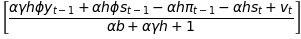

In [47]:
eq_y = sm.solve(sm.Eq(AS_minus_AD,0),yt)
eq_y

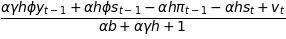

In [48]:
eq_yt= ((alpha*gamma*h*phi*yt_m1+alpha*h*phi*st_m1-alpha*h*pit_m1-alpha*h*st+vt)/(alpha*b+alpha*gamma*h+1))
eq_yt

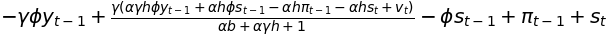

In [49]:
eq_pi= SRAS_pit.subs(yt,eq_yt)
eq_pi

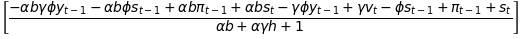

In [51]:
#not necessary
eq_pi= SRAS_pit.subs(yt,eq_yt)
eq_pii= sm.solve(sm.Eq(eq_pi,pit),pit)
eq_pii

Question 2

In [54]:
pms = {}

pms['alpha']=5.76
pms['h'] = 0.5
pms['b'] = 0.5
pms['phi'] = 0
pms['gamma'] = 0.075

In [55]:
equil_output= sm.lambdify((vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma),eq_y[0])
def equili_output (vt, st, pit_m1, st_m1, yt_m1, alpha=pms['alpha'], h=pms['h'], b=pms['b'], phi=pms['phi'], gamma=pms['gamma']):
    return equil_output (vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma)


In [56]:
equili_output(0,0,0,0,0)


In [57]:
equili_output(0.1,0,0,0,0)

In [64]:
equil_pi= sm.lambdify((pit_m1, yt, yt_m1, st, st_m1, gamma, phi), SRAS_pit)
def equili_pi (pit_m1, yt, yt_m1, st, st_m1, gamma=pms['gamma'], phi=pms['phi']):
    return equil_pi (pit_m1, yt, yt_m1, st, st_m1, gamma, phi)

In [65]:
equili_pi(0,0,0,0,0)

In [66]:
equili_pi(0,0.0244140625,0,0,0)

Question 3

In [67]:
pms["delta"] = 0.80
pms["omega"] = 0.15
delta = sm.symbols("delta")
omega = sm.symbols("omega")
vt_m1 = sm.symbols("v_t-1")
xt = sm.symbols("x_t")
ct = sm.symbols("c_t")


In [68]:
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

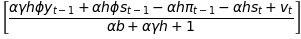

In [69]:
eq_y

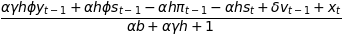

In [70]:
eq_y_ar = eq_y[0].subs(vt,vt_ar)
eq_y_ar

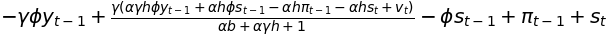

In [71]:
eq_pi

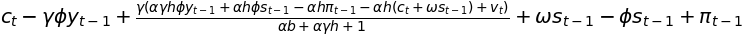

In [72]:
eq_pi_ar = eq_pi.subs(st,st_ar)
eq_pi_ar

In [73]:
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

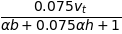

In [74]:
equili_pi_ar(0,0,0,0,0)

In [ ]:
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

In [ ]:
#other approach

In [ ]:
#define shocks:
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

In [ ]:
#set number of periods
P= 1000
# all initial values are 0:
initial_y= 